Basic Data Exploration

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import radviz

In [2]:
df = pd.read_csv('/src/dataset/Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df = df.drop(columns=["Id"])

In [5]:
print(df.shape)

(150, 5)


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [7]:
print(df['Species'].value_counts())

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64


In [8]:
print(df.describe())

       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


RadViz Plot

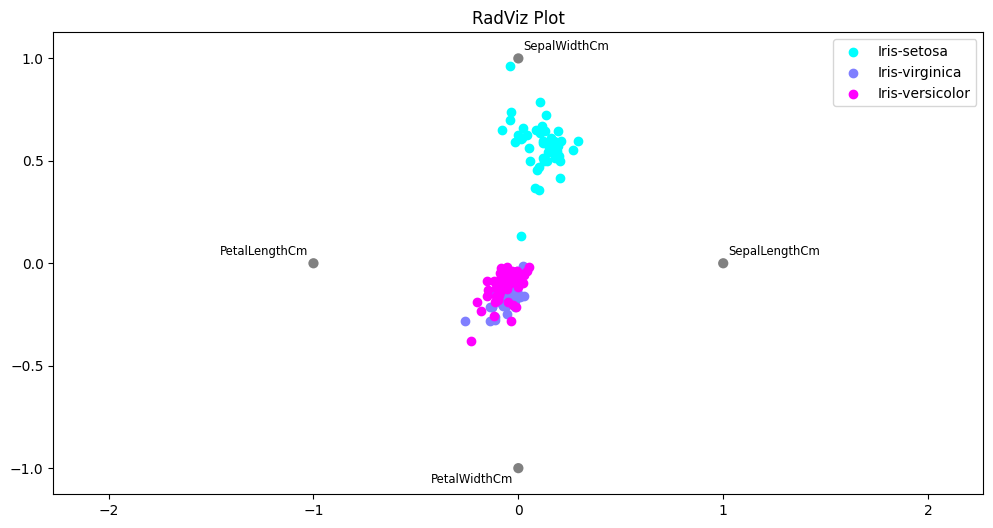

In [9]:
plt.figure(figsize=(12, 6))
radviz(df.sample(150), 'Species', colormap='cool')
plt.title('RadViz Plot')
plt.show()

Pairplot

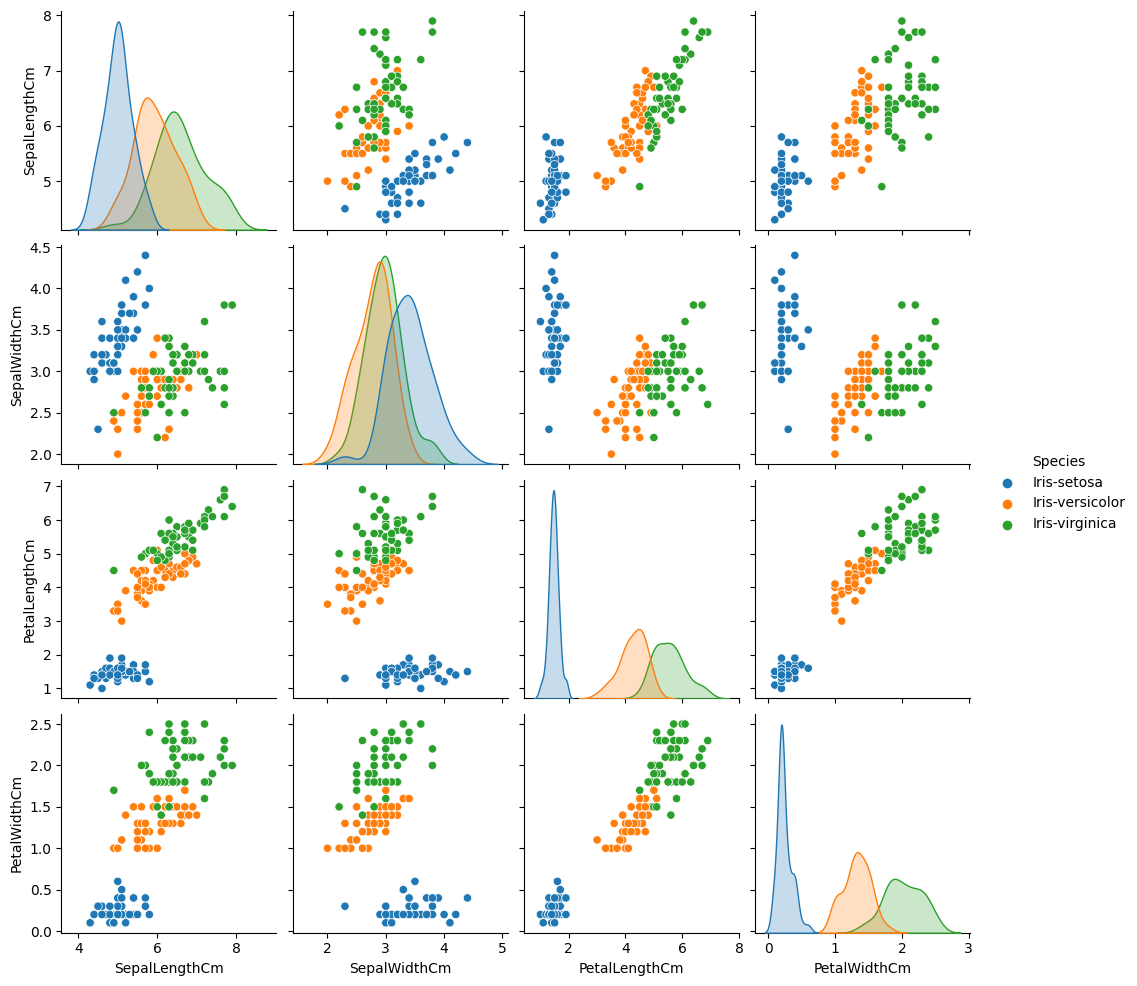

In [10]:
sns.pairplot(df, hue="Species")
plt.show()

Distribution Plots

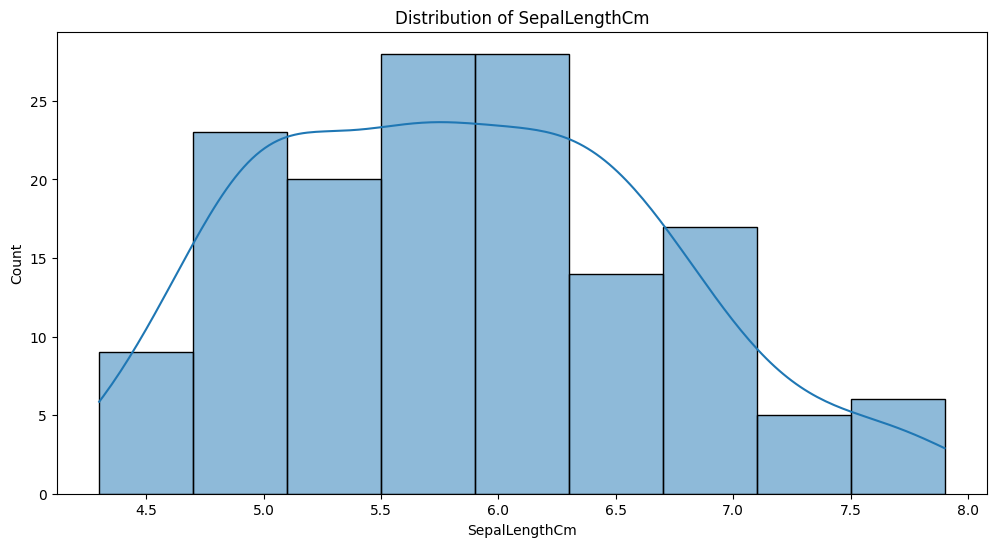

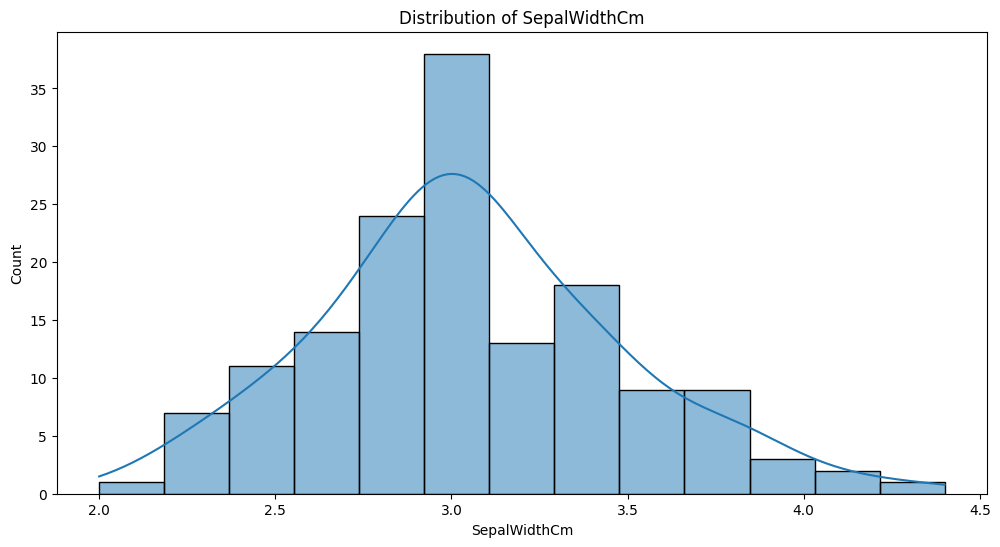

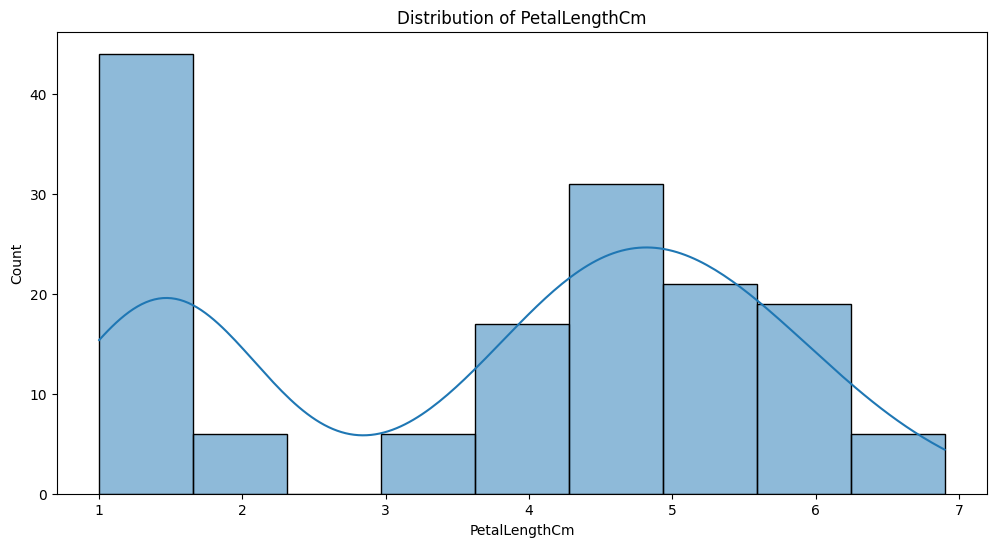

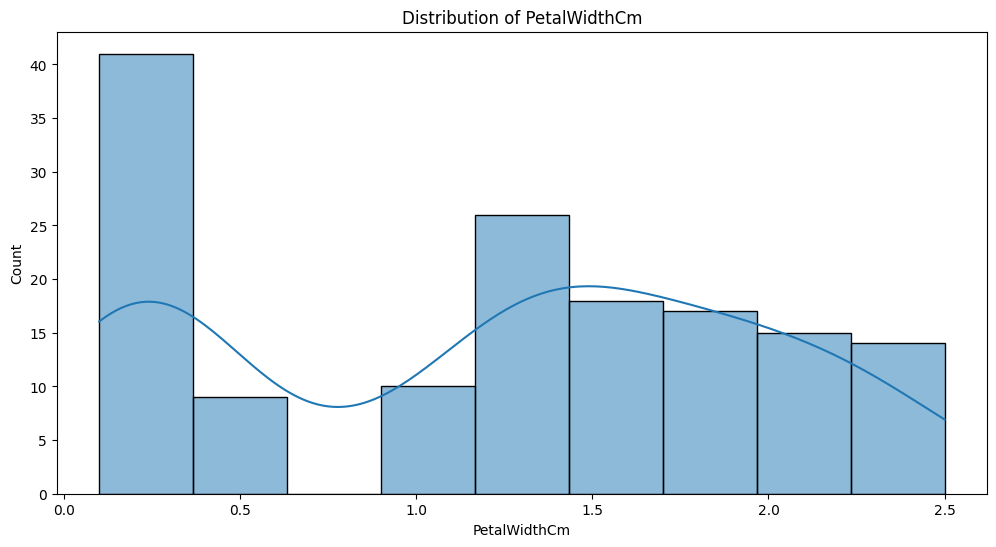

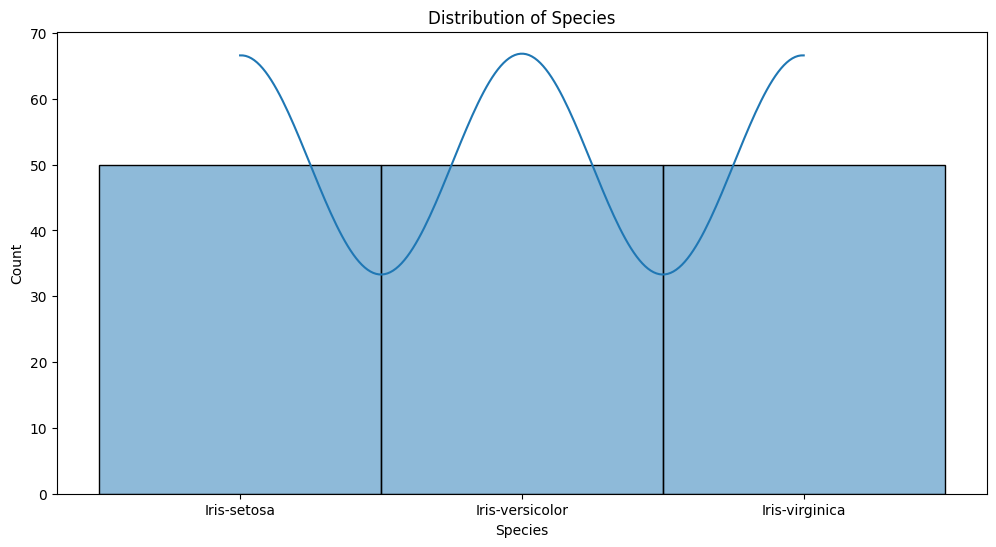

In [11]:
for column in df.columns:
    plt.figure(figsize=(12, 6))
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

Distribution Plots by Species (Target Variable)

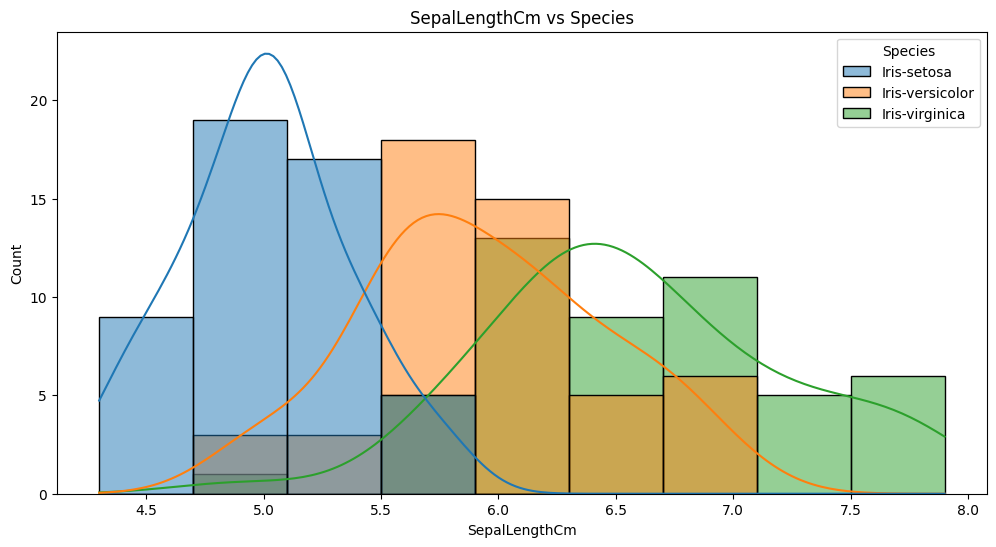

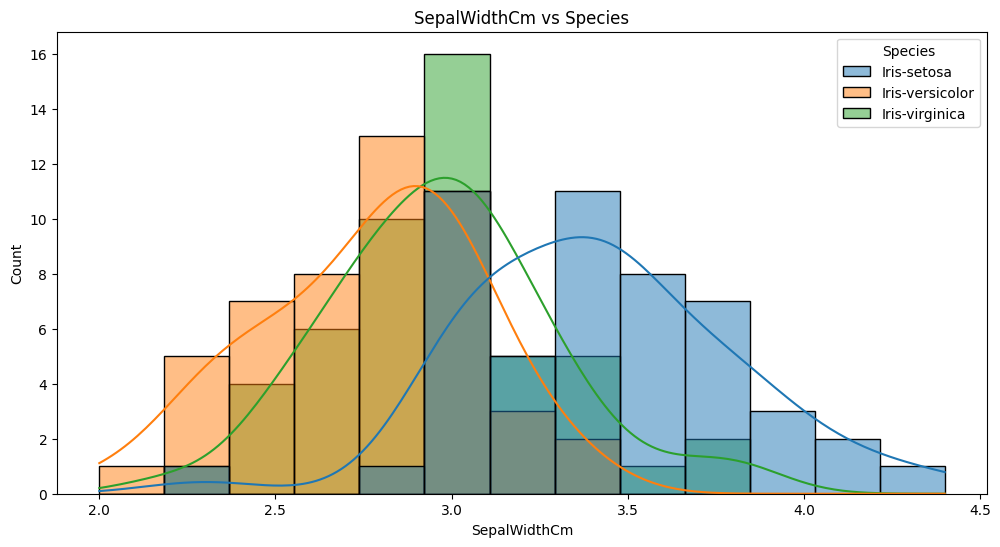

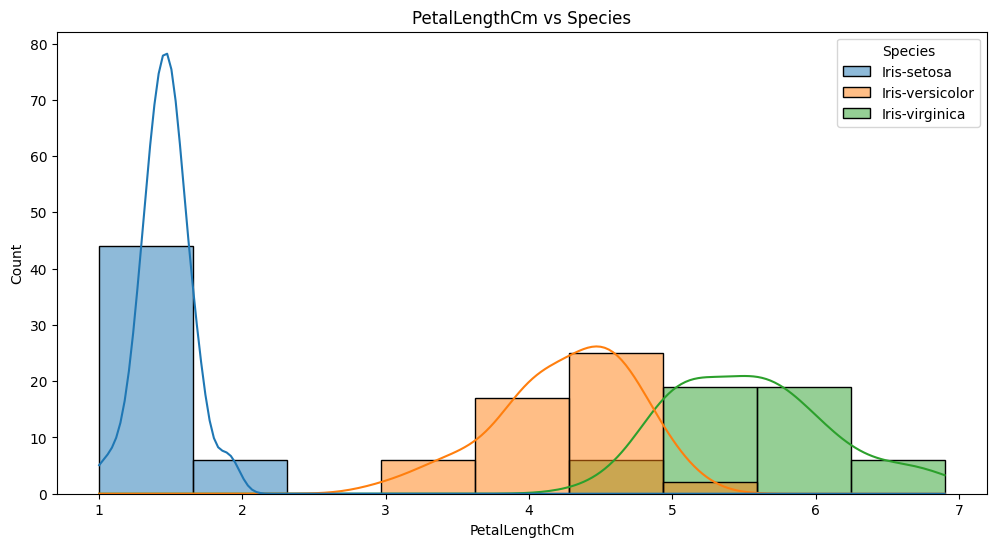

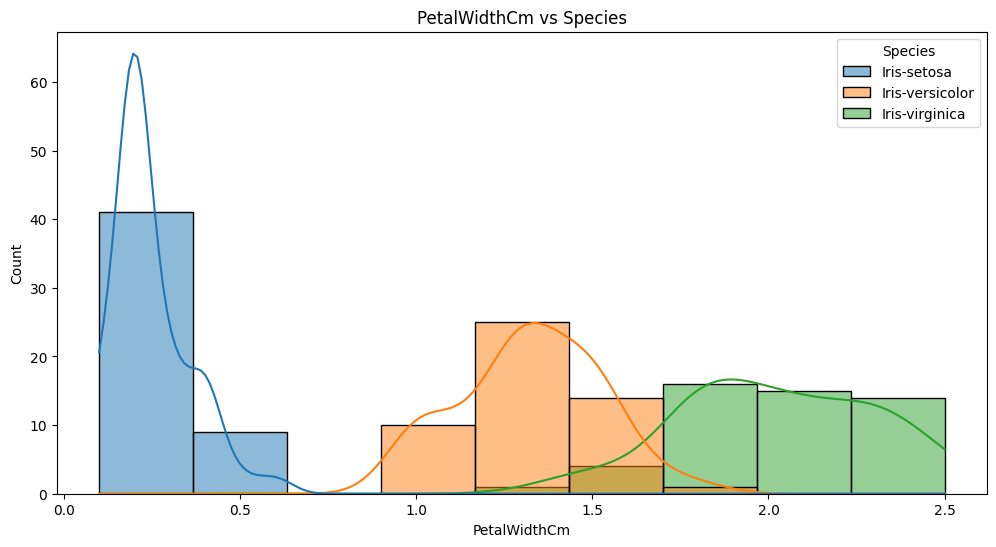

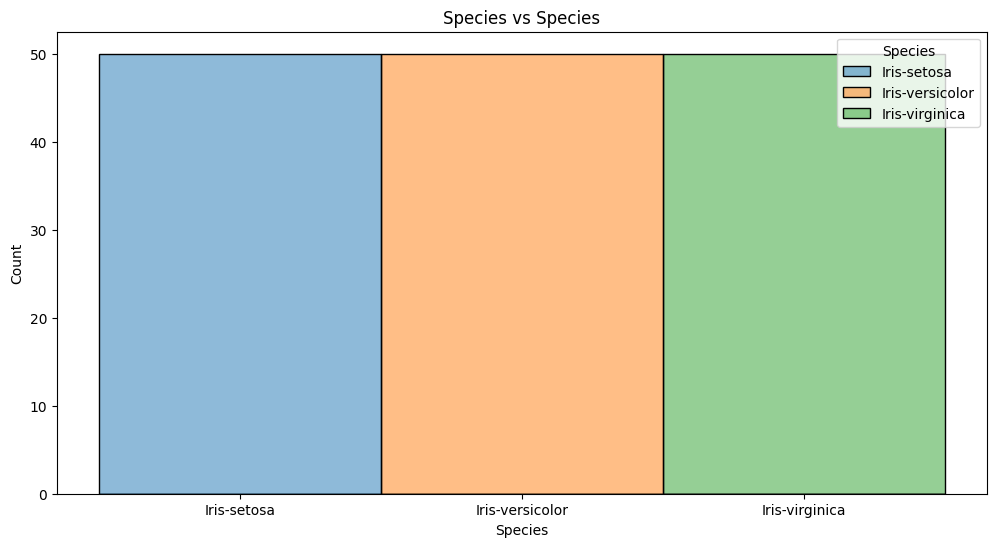

In [12]:
for column in df.columns:
    plt.figure(figsize=(12, 6))
    sns.histplot(data=df, x=column, kde=True, hue='Species')
    plt.title(f'{column} vs Species')
    plt.show()

Box Plots

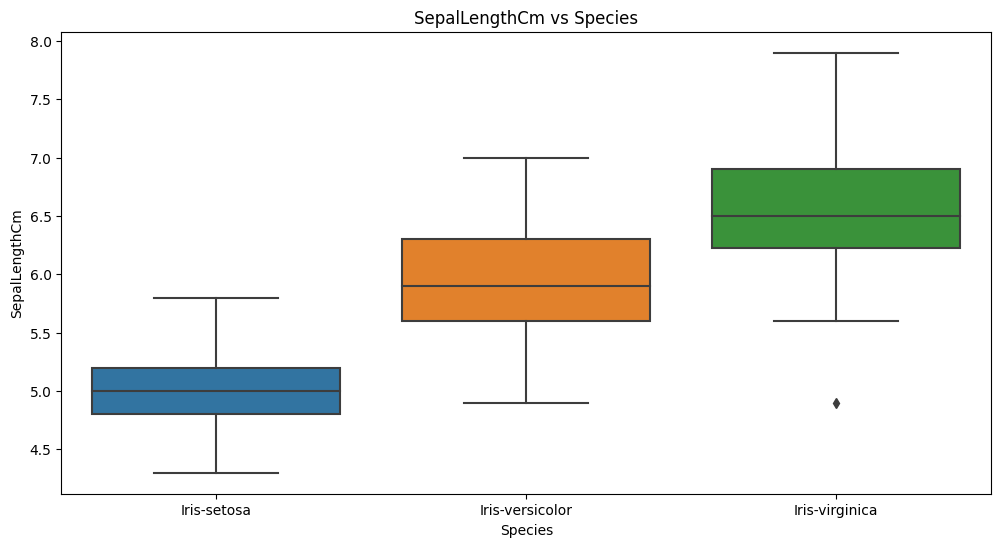

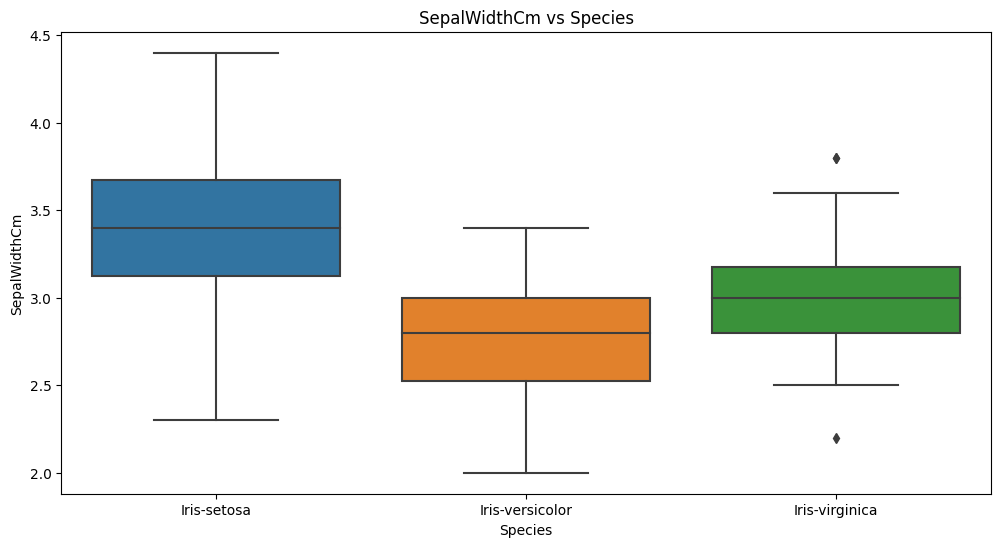

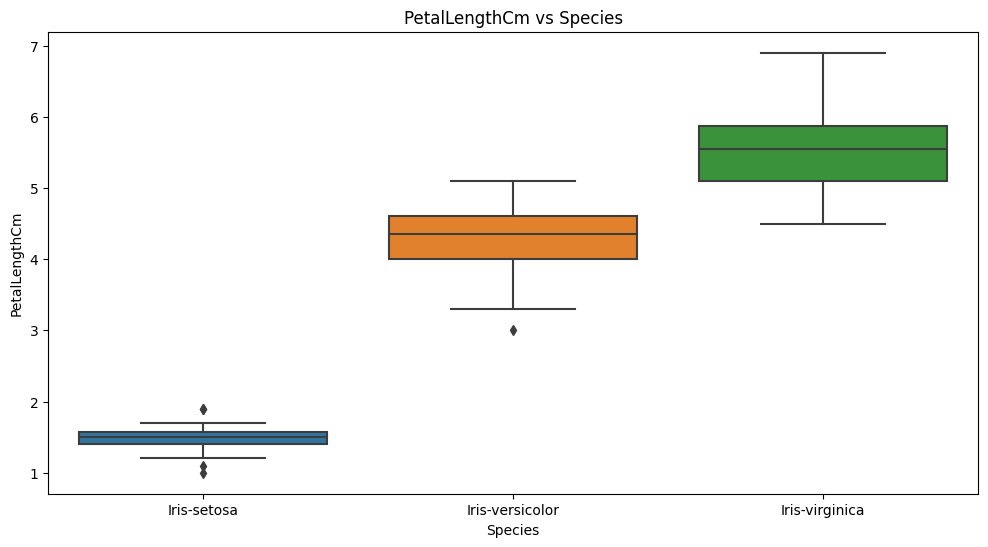

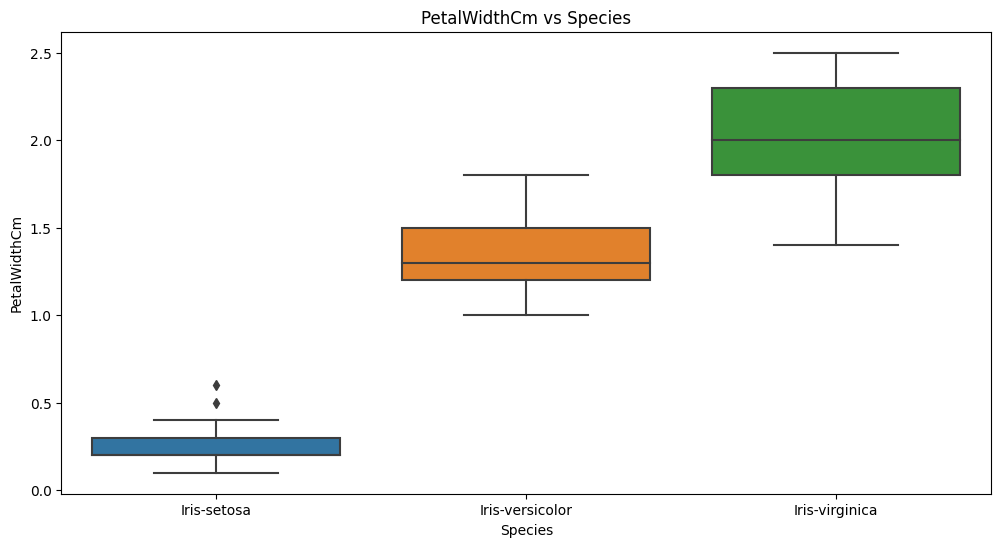

In [13]:
for column in df.drop(columns=['Species']):
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='Species', y=column)
    plt.title(f'{column} vs Species')
    plt.show()

Violin Plots

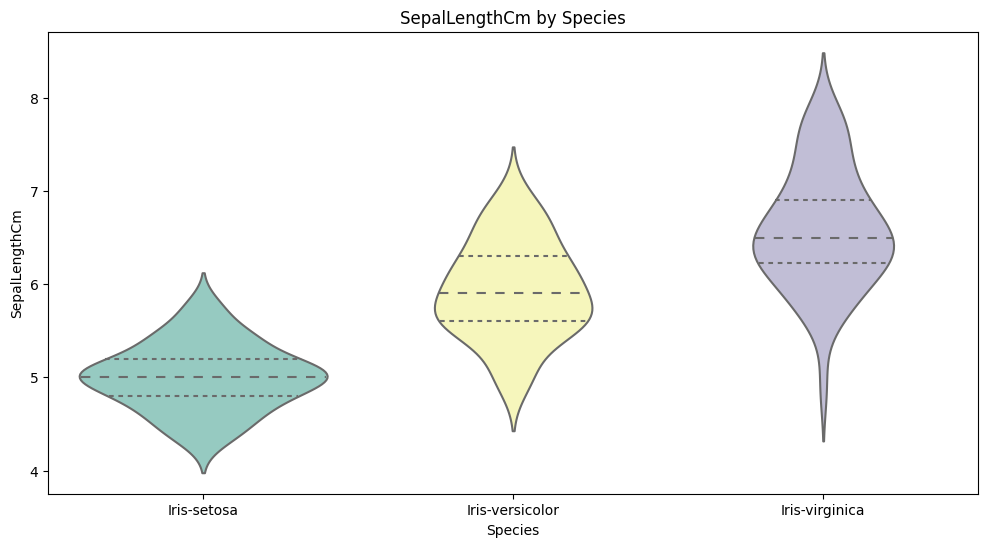

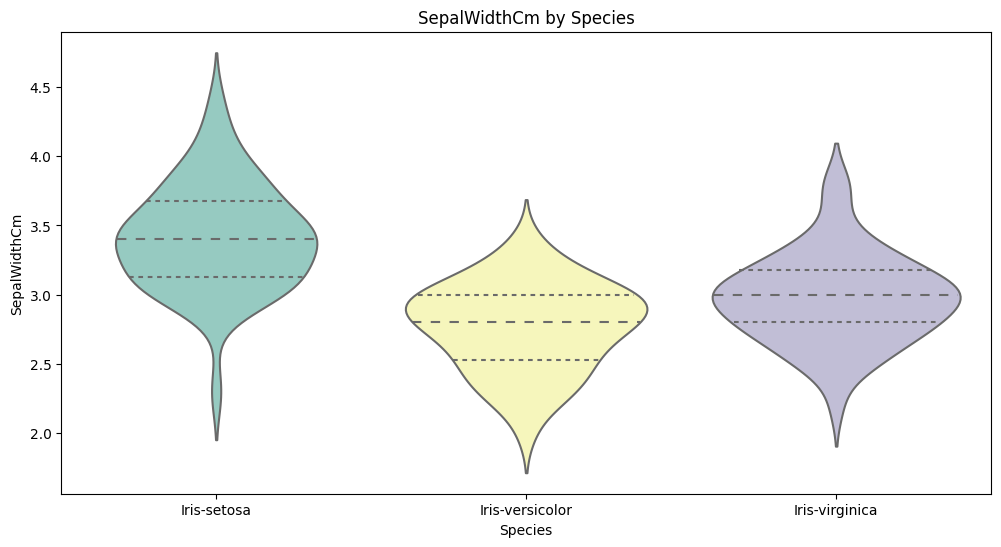

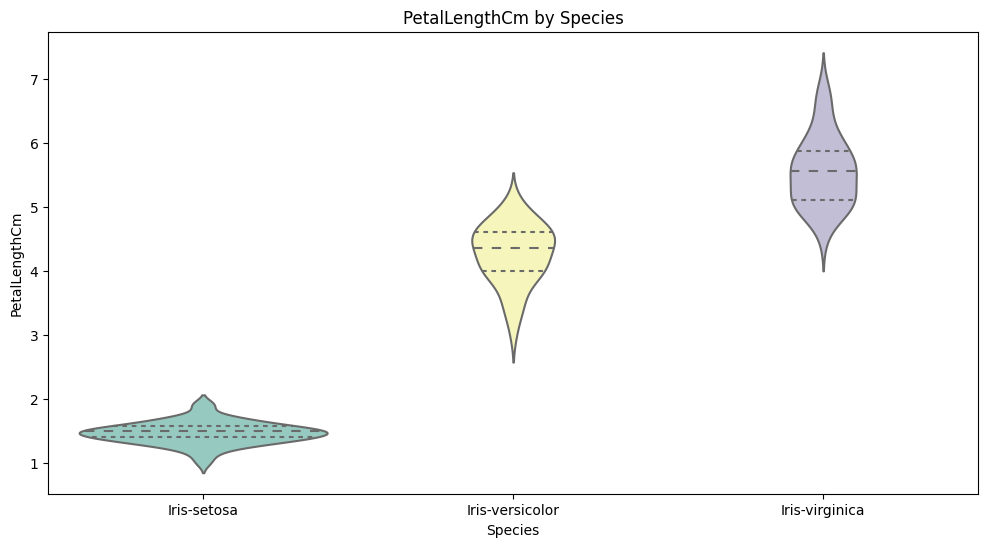

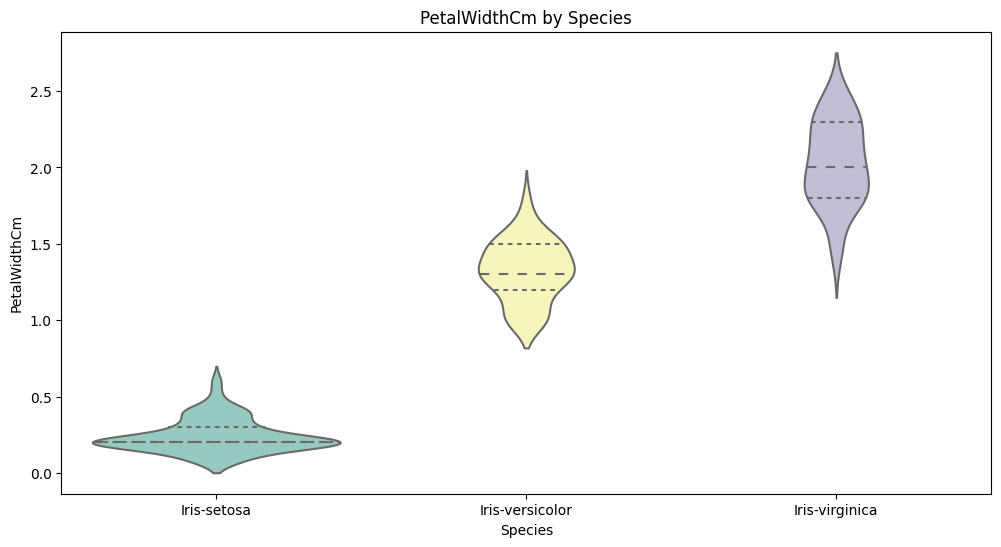

In [14]:
for column in df.drop(columns=['Species']):
    plt.figure(figsize=(12, 6))
    sns.violinplot(data=df, x='Species', y=column, inner='quart', palette='Set3')
    plt.title(f'{column} by Species')
    plt.show()

Correlation Heatmap

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

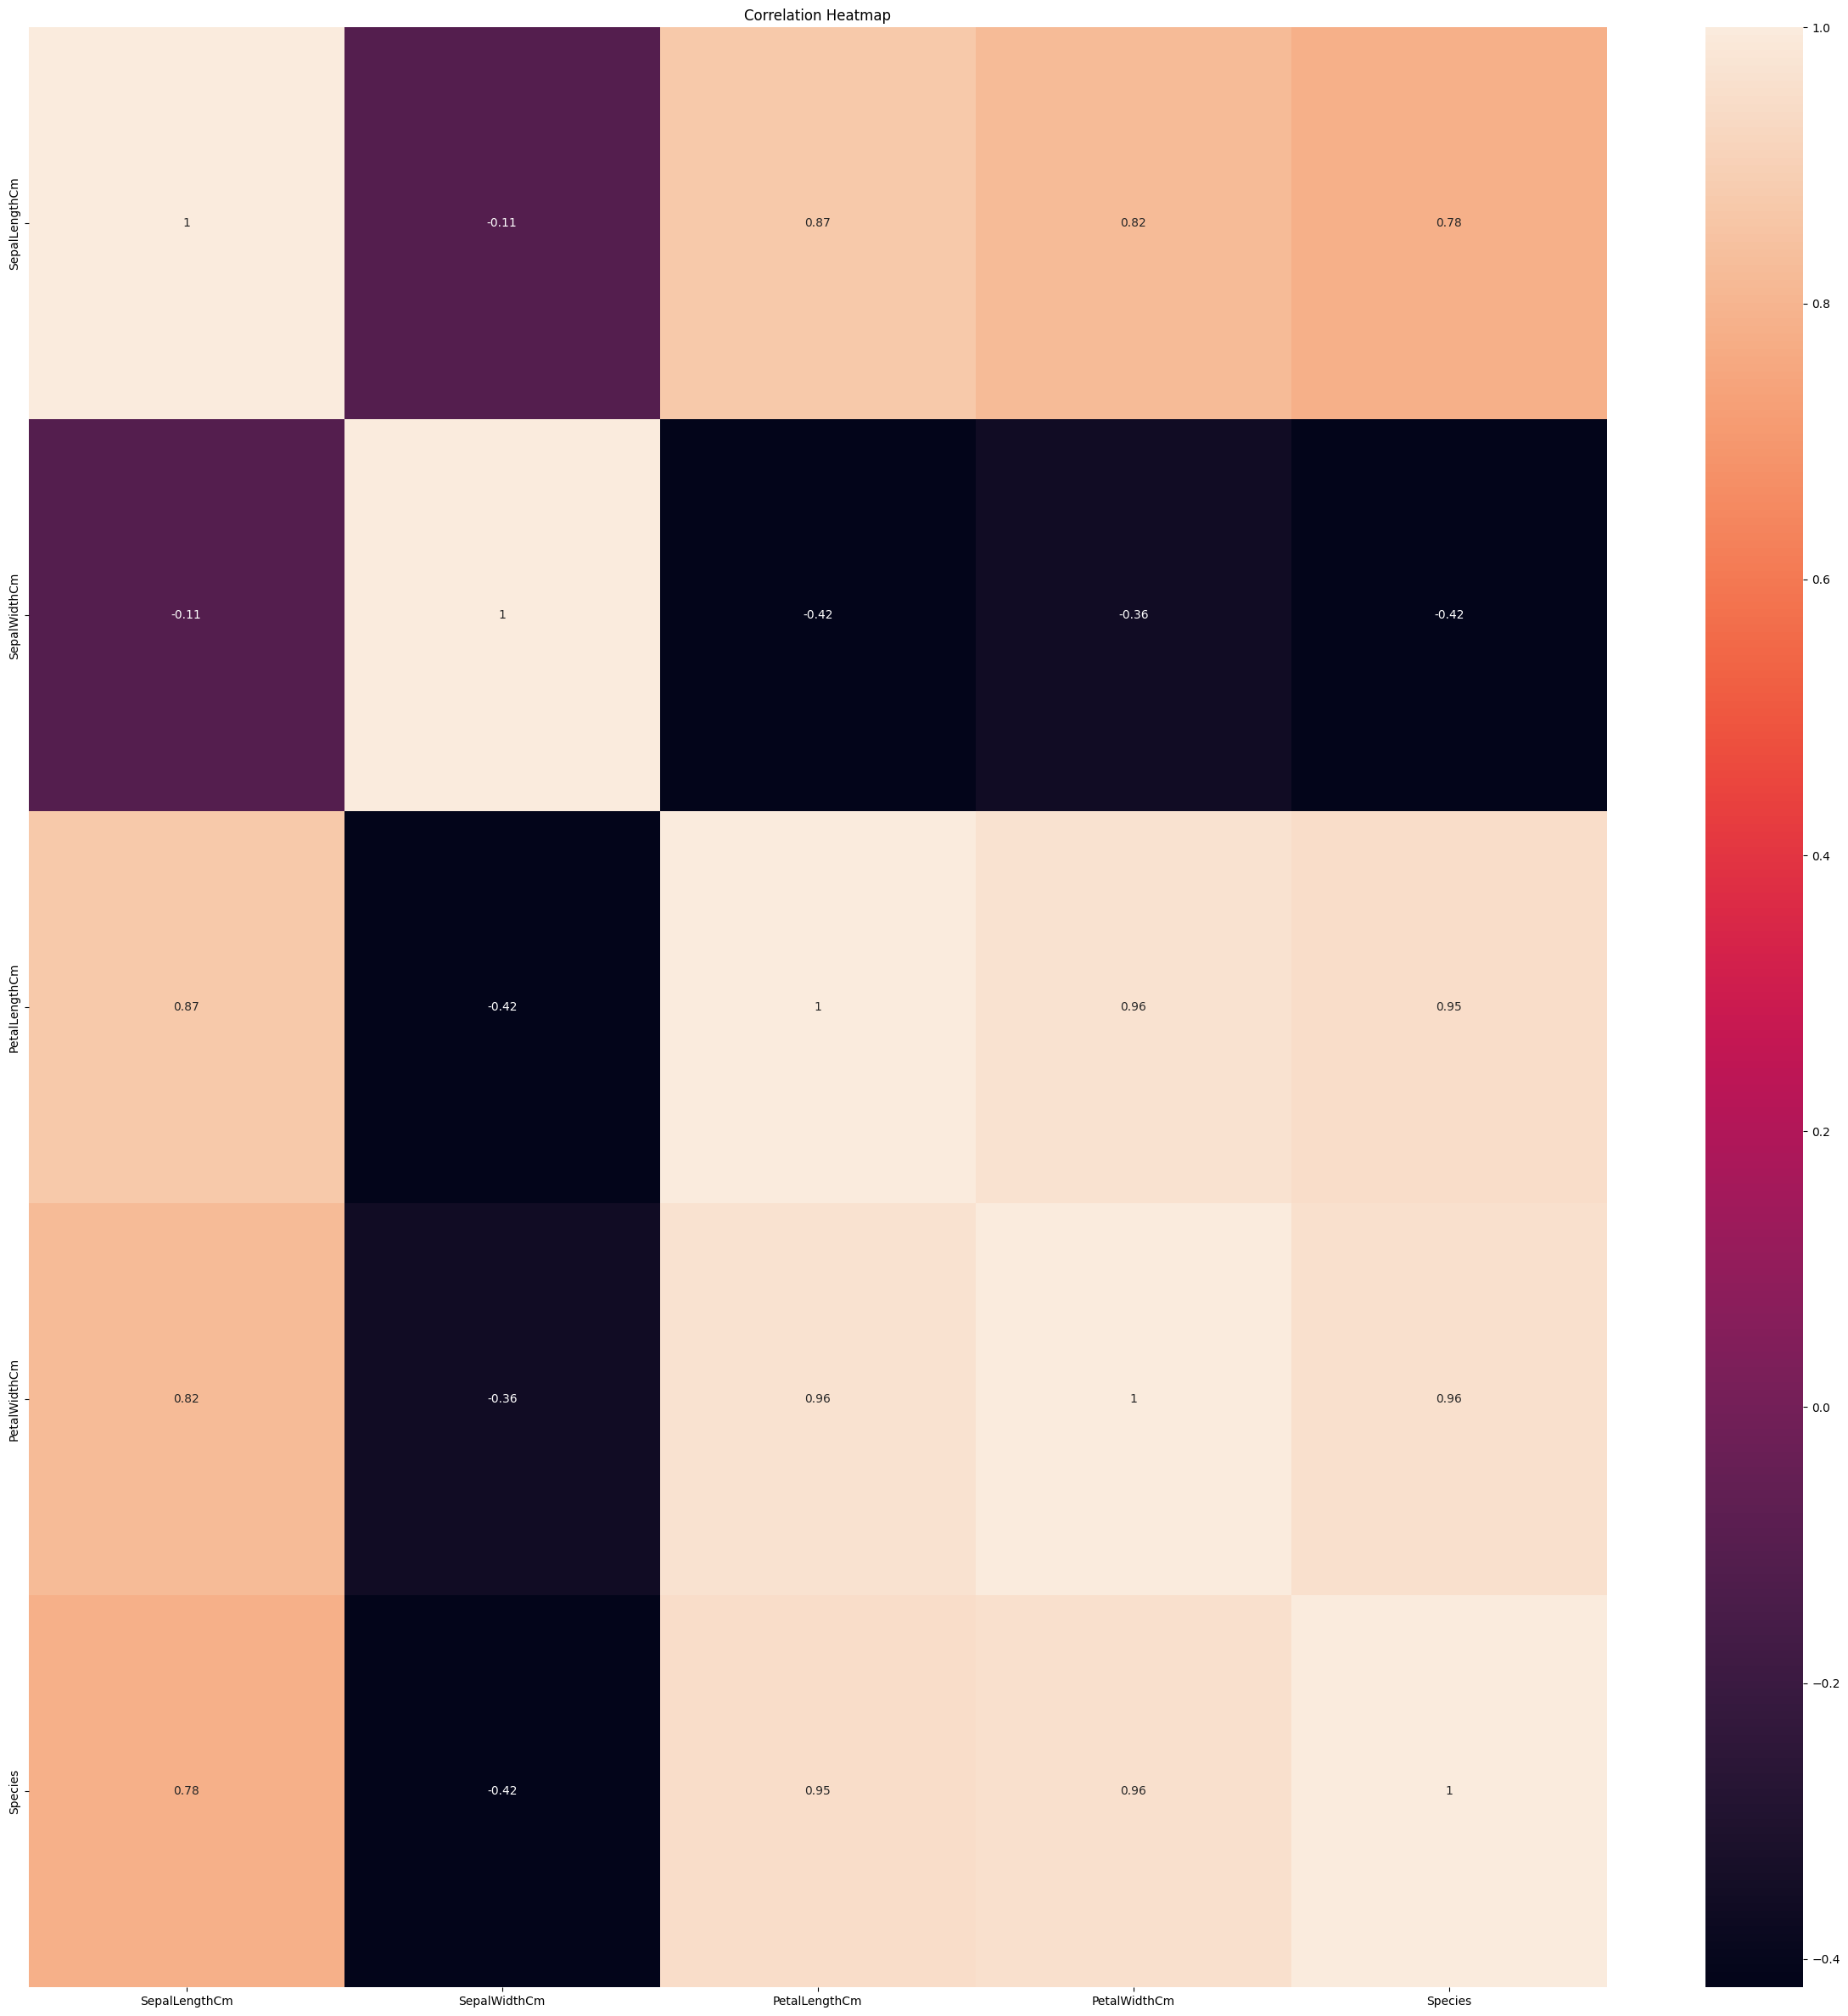

In [17]:
map = plt.figure(figsize=(30,30))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()